## Hierarchical Clustering

**Hierarchical Clustering** is an unsupervised machine learning algorithm used to group similar data points into **nested clusters**. It builds a hierarchy or tree (called a **dendrogram**) of clusters.

---

## Types of Hierarchical Clustering

### 🔹 1. Agglomerative (Bottom-Up)
- Start with **each data point as its own cluster**.
- At each step, **merge the two closest clusters**.
- Repeat until all points belong to one cluster or a stopping condition is met.

> This is the most commonly used method.

### 🔹 2. Divisive (Top-Down)
- Start with **all data points in one cluster**.
- Recursively **split the cluster** into smaller clusters.


Distance between the clusters:

- Distance between 2 clusters is the distance between the averages of the clusters’ elements
- Euclidean-approach is when we assume that observations are simiar if the calculated distance is small
- the correlation-based distance assumes observations to be similar if the features are highly correlated

1) initialize each data point in its own cluster 
(initialization phase)
2) find the two closest clusters and merge them
3) repeat the algorithm until just a single cluster left



### Algorithm

1) Find the closest pair of points

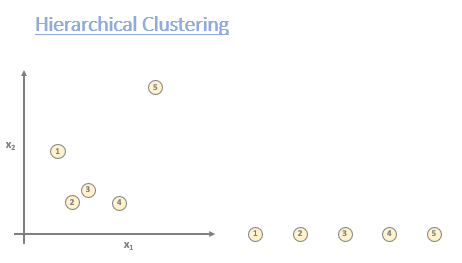

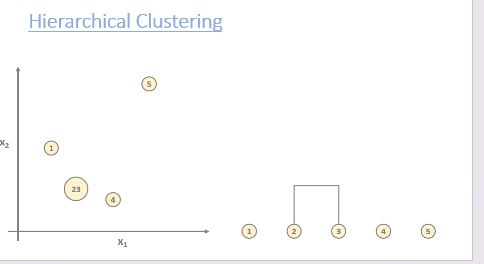

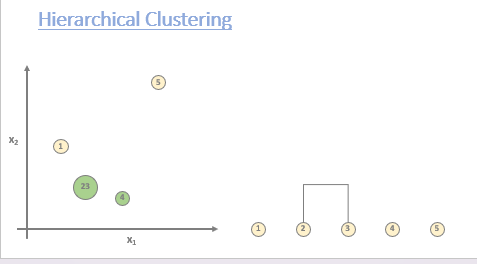

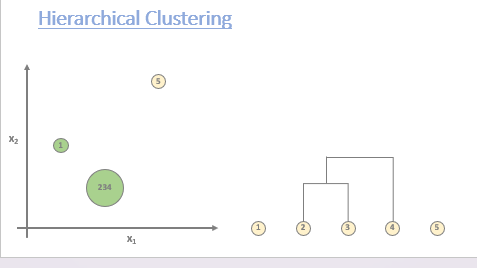

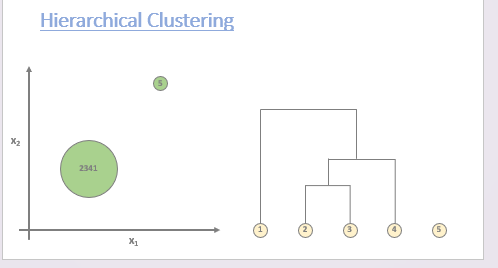

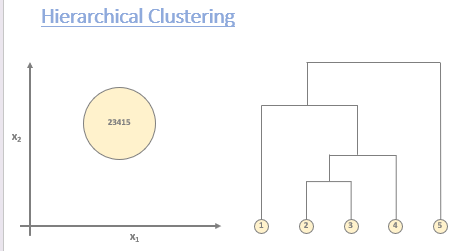


If we need 2 clusters, then we draw a horizontal line to cut the dendogram at exactly 2 points.


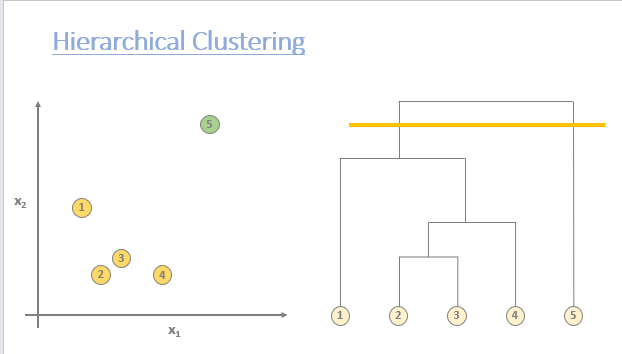

Hierarchical clustering not in the scikit learn, have to use scipy

In [2]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


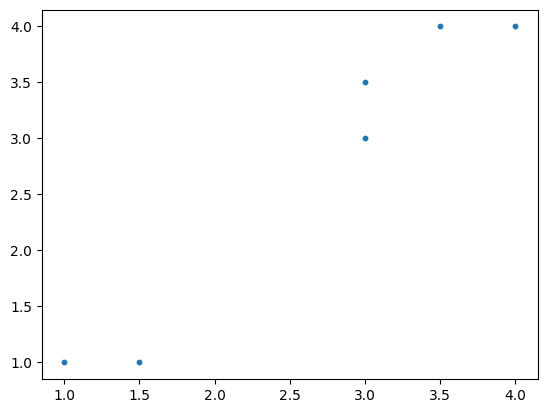

In [4]:
X=np.array([[1, 1], [1.5,1], [3, 3], [4,4], [3,3.5], [3.5,4]])
plt.scatter(X[:, 0], X[:, 1], s=10)

In [7]:
linkage_matrix = linkage(X, 'single') #distance between clusters is the minimum distance between points in the clusters
linkage_matrix

array([[0.        , 1.        , 0.5       , 2.        ],
       [2.        , 4.        , 0.5       , 2.        ],
       [3.        , 5.        , 0.5       , 2.        ],
       [7.        , 8.        , 0.70710678, 4.        ],
       [6.        , 9.        , 2.5       , 6.        ]])

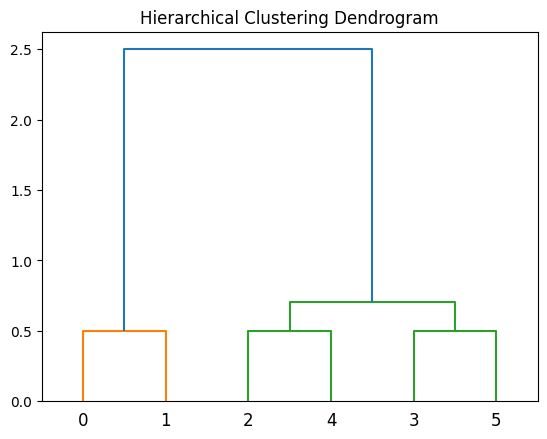

In [8]:
dendrogram = dendrogram(linkage_matrix, truncate_mode='none')
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

### Market Segmentation

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [11]:
df=pd.read_csv(f"data/shopping_data.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.shape

(200, 5)

In [12]:
data=df.iloc[:,3:5]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


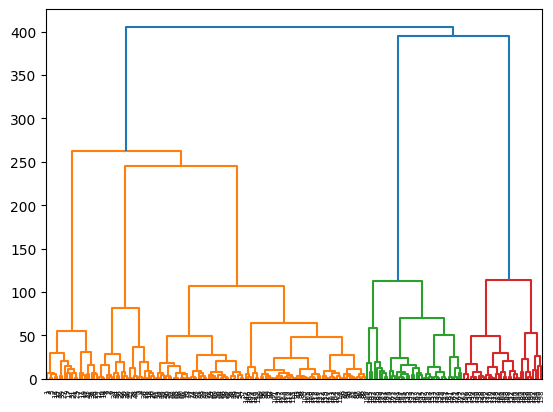

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
dend=dendrogram(linkage(data, method='ward'))

With the help of the dendogram,we can figure out the optimal number of clusters.

Draw a horizontal line just below that large vertical gap.

Count how many vertical lines it cuts.

That number = optimal number of clusters.



here it is 5

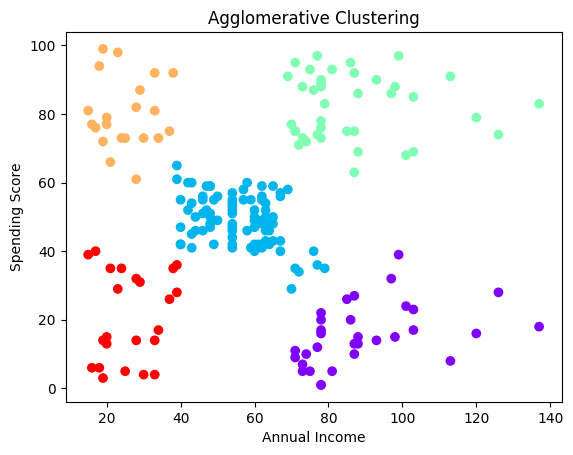

In [16]:
## perform aggolomerative clustering with k=5
model= AgglomerativeClustering(n_clusters=5, linkage='ward')
ypred= model.fit_predict(data)
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=ypred, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

We can find the type of customers who shop more

You want to visualize how clusters form (dendrogram).

Your data has non-spherical clusters.

The dataset is moderate in size (few thousand samples).

You don’t know k and want to discover cluster structure.



| Disadvantage                           | Explanation                                                                                               |
| -------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| **1. Time Complexity: O(n²)**          | Slow for large datasets because it computes pairwise distances for all points.                            |
| **2. Sensitive to noise and outliers** | Outliers can become individual clusters or skew merges.                                                   |
| **3. Merging is irreversible**         | Once two clusters are merged, they cannot be split later — even if that merge turns out to be suboptimal. |
| **4. Requires a good distance metric** | Bad choice of metric (e.g., Euclidean for text data) can hurt performance.                                |
| **5. Difficult to scale**              | Not suitable for very large datasets without optimizations like approximate methods.                      |
